# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (N

Epoch 49/50
196/196 [==============================] - 4s 18ms/step - loss: 2.3041 - accuracy: 0.0988 - val_loss: 2.3052 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 4s 18ms/step - loss: 2.3041 - accuracy: 0.0993 - val_loss: 2.3043 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_

196/196 [==============================] - 4s 22ms/step - loss: 0.7689 - accuracy: 0.7248 - val_loss: 1.5749 - val_accuracy: 0.5209
Epoch 47/50
196/196 [==============================] - 4s 20ms/step - loss: 0.7665 - accuracy: 0.7262 - val_loss: 1.5528 - val_accuracy: 0.5188
Epoch 48/50
196/196 [==============================] - 4s 19ms/step - loss: 0.7453 - accuracy: 0.7358 - val_loss: 1.6360 - val_accuracy: 0.5239
Epoch 49/50
196/196 [==============================] - 4s 19ms/step - loss: 0.7205 - accuracy: 0.7438 - val_loss: 1.6313 - val_accuracy: 0.5227
Epoch 50/50
196/196 [==============================] - 4s 18ms/step - loss: 0.7125 - accuracy: 0.7450 - val_loss: 1.6656 - val_accuracy: 0.5196
Experiment with LR = 0.001000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________

Epoch 44/50
196/196 [==============================] - 4s 19ms/step - loss: 0.9454 - accuracy: 0.6629 - val_loss: 1.3828 - val_accuracy: 0.5319
Epoch 45/50
196/196 [==============================] - 4s 21ms/step - loss: 0.9190 - accuracy: 0.6717 - val_loss: 1.4141 - val_accuracy: 0.5250
Epoch 46/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9088 - accuracy: 0.6751 - val_loss: 1.3817 - val_accuracy: 0.5383
Epoch 47/50
196/196 [==============================] - 4s 21ms/step - loss: 0.8931 - accuracy: 0.6817 - val_loss: 1.3791 - val_accuracy: 0.5355
Epoch 48/50
196/196 [==============================] - 4s 21ms/step - loss: 0.8733 - accuracy: 0.6889 - val_loss: 1.5050 - val_accuracy: 0.5165
Epoch 49/50
196/196 [==============================] - 4s 21ms/step - loss: 0.8684 - accuracy: 0.6891 - val_loss: 1.4596 - val_accuracy: 0.5191
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 0.8640 - accuracy: 0.6910 - val_loss: 1.4510 - val_accuracy:

Epoch 42/50
196/196 [==============================] - 4s 21ms/step - loss: 1.5707 - accuracy: 0.4464 - val_loss: 1.5747 - val_accuracy: 0.4455
Epoch 43/50
196/196 [==============================] - 4s 20ms/step - loss: 1.5644 - accuracy: 0.4476 - val_loss: 1.5823 - val_accuracy: 0.4360
Epoch 44/50
196/196 [==============================] - 4s 21ms/step - loss: 1.5597 - accuracy: 0.4502 - val_loss: 1.5710 - val_accuracy: 0.4430
Epoch 45/50
196/196 [==============================] - 4s 20ms/step - loss: 1.5536 - accuracy: 0.4515 - val_loss: 1.5618 - val_accuracy: 0.4517
Epoch 46/50
196/196 [==============================] - 4s 19ms/step - loss: 1.5462 - accuracy: 0.4554 - val_loss: 1.5548 - val_accuracy: 0.4502
Epoch 47/50
196/196 [==============================] - 4s 18ms/step - loss: 1.5420 - accuracy: 0.4558 - val_loss: 1.5532 - val_accuracy: 0.4469
Epoch 48/50
196/196 [==============================] - 4s 18ms/step - loss: 1.5361 - accuracy: 0.4579 - val_loss: 1.5574 - val_accuracy:

Epoch 40/50
196/196 [==============================] - 3s 18ms/step - loss: 2.1233 - accuracy: 0.2520 - val_loss: 2.1200 - val_accuracy: 0.2574
Epoch 41/50
196/196 [==============================] - 4s 18ms/step - loss: 2.1186 - accuracy: 0.2540 - val_loss: 2.1151 - val_accuracy: 0.2595
Epoch 42/50
196/196 [==============================] - 3s 18ms/step - loss: 2.1138 - accuracy: 0.2563 - val_loss: 2.1103 - val_accuracy: 0.2629
Epoch 43/50
196/196 [==============================] - 4s 18ms/step - loss: 2.1090 - accuracy: 0.2589 - val_loss: 2.1055 - val_accuracy: 0.2657
Epoch 44/50
196/196 [==============================] - 3s 18ms/step - loss: 2.1042 - accuracy: 0.2610 - val_loss: 2.1007 - val_accuracy: 0.2686
Epoch 45/50
196/196 [==============================] - 3s 18ms/step - loss: 2.0994 - accuracy: 0.2630 - val_loss: 2.0959 - val_accuracy: 0.2724
Epoch 46/50
196/196 [==============================] - 3s 18ms/step - loss: 2.0946 - accuracy: 0.2662 - val_loss: 2.0911 - val_accuracy:

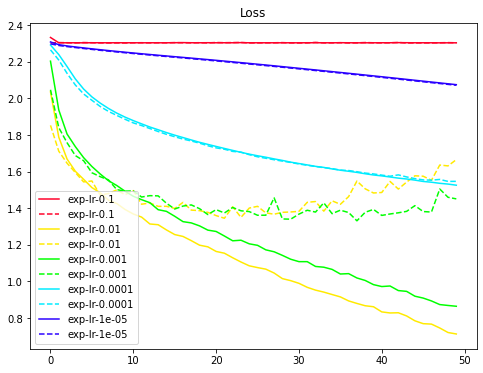

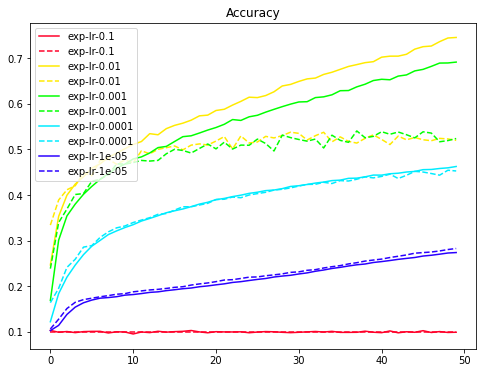

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr, rho=0.9, epsilon=1e-08, decay=0.0)
    
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (N

Epoch 49/50
196/196 [==============================] - 5s 28ms/step - loss: 2.3078 - accuracy: 0.1010 - val_loss: 2.3096 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 6s 28ms/step - loss: 2.3078 - accuracy: 0.0983 - val_loss: 2.3106 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_

Epoch 47/50
196/196 [==============================] - 5s 27ms/step - loss: 2.3032 - accuracy: 0.0996 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 5s 28ms/step - loss: 2.3032 - accuracy: 0.0982 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 5s 27ms/step - loss: 2.3030 - accuracy: 0.0988 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 5s 27ms/step - loss: 2.3032 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.1000
Experiment with LR = 0.001000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________

Epoch 45/50
196/196 [==============================] - 5s 27ms/step - loss: 0.8971 - accuracy: 0.6763 - val_loss: 1.6980 - val_accuracy: 0.4754
Epoch 46/50
196/196 [==============================] - 5s 27ms/step - loss: 0.8743 - accuracy: 0.6861 - val_loss: 1.6788 - val_accuracy: 0.4961
Epoch 47/50
196/196 [==============================] - 5s 27ms/step - loss: 0.8640 - accuracy: 0.6880 - val_loss: 1.8290 - val_accuracy: 0.4813
Epoch 48/50
196/196 [==============================] - 5s 27ms/step - loss: 0.8559 - accuracy: 0.6934 - val_loss: 1.6960 - val_accuracy: 0.4878
Epoch 49/50
196/196 [==============================] - 5s 27ms/step - loss: 0.8413 - accuracy: 0.6971 - val_loss: 1.8372 - val_accuracy: 0.4656
Epoch 50/50
196/196 [==============================] - 5s 27ms/step - loss: 0.8345 - accuracy: 0.7000 - val_loss: 1.9502 - val_accuracy: 0.4733
Experiment with LR = 0.000100
Model: "model"
_________________________________________________________________
Layer (type)             

Epoch 43/50
196/196 [==============================] - 6s 31ms/step - loss: 1.0547 - accuracy: 0.6330 - val_loss: 1.3597 - val_accuracy: 0.5277
Epoch 44/50
196/196 [==============================] - 6s 29ms/step - loss: 1.0409 - accuracy: 0.6372 - val_loss: 1.4778 - val_accuracy: 0.5022
Epoch 45/50
196/196 [==============================] - 6s 28ms/step - loss: 1.0325 - accuracy: 0.6382 - val_loss: 1.4140 - val_accuracy: 0.5113
Epoch 46/50
196/196 [==============================] - 6s 30ms/step - loss: 1.0233 - accuracy: 0.6425 - val_loss: 1.4028 - val_accuracy: 0.5220
Epoch 47/50
196/196 [==============================] - 6s 30ms/step - loss: 1.0103 - accuracy: 0.6474 - val_loss: 1.4332 - val_accuracy: 0.5120
Epoch 48/50
196/196 [==============================] - 5s 28ms/step - loss: 0.9987 - accuracy: 0.6505 - val_loss: 1.4184 - val_accuracy: 0.5236
Epoch 49/50
196/196 [==============================] - 5s 28ms/step - loss: 0.9895 - accuracy: 0.6550 - val_loss: 1.3734 - val_accuracy:

Epoch 41/50
196/196 [==============================] - 6s 28ms/step - loss: 1.4873 - accuracy: 0.4809 - val_loss: 1.5392 - val_accuracy: 0.4566
Epoch 42/50
196/196 [==============================] - 6s 28ms/step - loss: 1.4834 - accuracy: 0.4822 - val_loss: 1.5303 - val_accuracy: 0.4615
Epoch 43/50
196/196 [==============================] - 6s 28ms/step - loss: 1.4786 - accuracy: 0.4842 - val_loss: 1.5259 - val_accuracy: 0.4545
Epoch 44/50
196/196 [==============================] - 5s 28ms/step - loss: 1.4744 - accuracy: 0.4867 - val_loss: 1.5317 - val_accuracy: 0.4598
Epoch 45/50
196/196 [==============================] - 6s 28ms/step - loss: 1.4691 - accuracy: 0.4868 - val_loss: 1.5485 - val_accuracy: 0.4532
Epoch 46/50
196/196 [==============================] - 6s 29ms/step - loss: 1.4638 - accuracy: 0.4895 - val_loss: 1.5098 - val_accuracy: 0.4682
Epoch 47/50
196/196 [==============================] - 5s 28ms/step - loss: 1.4596 - accuracy: 0.4919 - val_loss: 1.5298 - val_accuracy:

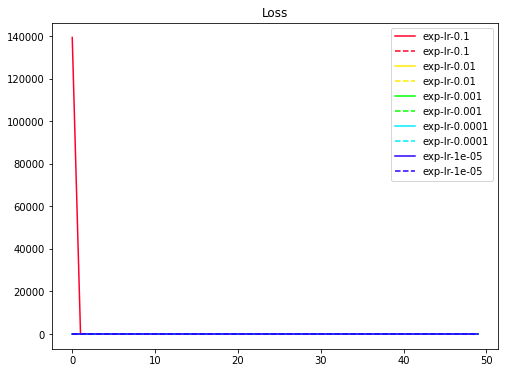

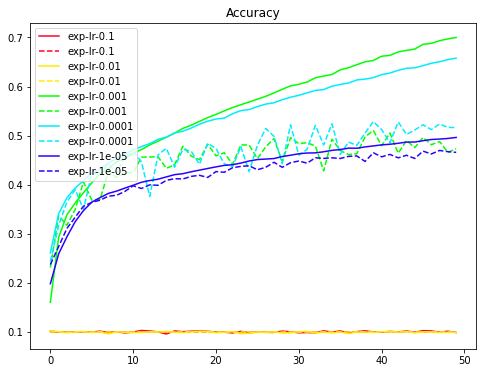

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [12]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (N

Epoch 49/50
196/196 [==============================] - 4s 19ms/step - loss: 0.8170 - accuracy: 0.7049 - val_loss: 1.8604 - val_accuracy: 0.4729
Epoch 50/50
196/196 [==============================] - 4s 19ms/step - loss: 0.7932 - accuracy: 0.7147 - val_loss: 2.0756 - val_accuracy: 0.4584
Experiment with LR = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_

Epoch 47/50
196/196 [==============================] - 4s 20ms/step - loss: 1.0301 - accuracy: 0.6362 - val_loss: 1.3810 - val_accuracy: 0.5133
Epoch 48/50
196/196 [==============================] - 4s 20ms/step - loss: 1.0179 - accuracy: 0.6416 - val_loss: 1.4198 - val_accuracy: 0.5078
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 1.0057 - accuracy: 0.6468 - val_loss: 1.4053 - val_accuracy: 0.5125
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9923 - accuracy: 0.6490 - val_loss: 1.4155 - val_accuracy: 0.5130
Experiment with LR = 0.001000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________

Epoch 45/50
196/196 [==============================] - 4s 20ms/step - loss: 1.5316 - accuracy: 0.4606 - val_loss: 1.5483 - val_accuracy: 0.4546
Epoch 46/50
196/196 [==============================] - 4s 20ms/step - loss: 1.5268 - accuracy: 0.4632 - val_loss: 1.5576 - val_accuracy: 0.4479
Epoch 47/50
196/196 [==============================] - 4s 21ms/step - loss: 1.5219 - accuracy: 0.4648 - val_loss: 1.5679 - val_accuracy: 0.4433
Epoch 48/50
196/196 [==============================] - 4s 23ms/step - loss: 1.5171 - accuracy: 0.4650 - val_loss: 1.5838 - val_accuracy: 0.4409
Epoch 49/50
196/196 [==============================] - 5s 27ms/step - loss: 1.5132 - accuracy: 0.4679 - val_loss: 1.5472 - val_accuracy: 0.4523
Epoch 50/50
196/196 [==============================] - 4s 21ms/step - loss: 1.5087 - accuracy: 0.4686 - val_loss: 1.5522 - val_accuracy: 0.4521
Experiment with LR = 0.000100
Model: "model"
_________________________________________________________________
Layer (type)             

196/196 [==============================] - 4s 21ms/step - loss: 2.0560 - accuracy: 0.2671 - val_loss: 2.0516 - val_accuracy: 0.2714
Epoch 43/50
196/196 [==============================] - 4s 20ms/step - loss: 2.0512 - accuracy: 0.2688 - val_loss: 2.0467 - val_accuracy: 0.2706
Epoch 44/50
196/196 [==============================] - 4s 20ms/step - loss: 2.0464 - accuracy: 0.2702 - val_loss: 2.0419 - val_accuracy: 0.2724
Epoch 45/50
196/196 [==============================] - 4s 22ms/step - loss: 2.0417 - accuracy: 0.2724 - val_loss: 2.0373 - val_accuracy: 0.2743
Epoch 46/50
196/196 [==============================] - 4s 20ms/step - loss: 2.0370 - accuracy: 0.2743 - val_loss: 2.0329 - val_accuracy: 0.2743
Epoch 47/50
196/196 [==============================] - 4s 21ms/step - loss: 2.0325 - accuracy: 0.2751 - val_loss: 2.0283 - val_accuracy: 0.2776
Epoch 48/50
196/196 [==============================] - 4s 21ms/step - loss: 2.0280 - accuracy: 0.2776 - val_loss: 2.0241 - val_accuracy: 0.2796
Epoc

Epoch 40/50
196/196 [==============================] - 4s 21ms/step - loss: 2.2686 - accuracy: 0.1653 - val_loss: 2.2686 - val_accuracy: 0.1668
Epoch 41/50
196/196 [==============================] - 4s 22ms/step - loss: 2.2680 - accuracy: 0.1665 - val_loss: 2.2680 - val_accuracy: 0.1677
Epoch 42/50
196/196 [==============================] - 4s 20ms/step - loss: 2.2675 - accuracy: 0.1676 - val_loss: 2.2674 - val_accuracy: 0.1691
Epoch 43/50
196/196 [==============================] - 4s 20ms/step - loss: 2.2669 - accuracy: 0.1685 - val_loss: 2.2668 - val_accuracy: 0.1693
Epoch 44/50
196/196 [==============================] - 4s 20ms/step - loss: 2.2663 - accuracy: 0.1693 - val_loss: 2.2662 - val_accuracy: 0.1700
Epoch 45/50
196/196 [==============================] - 4s 20ms/step - loss: 2.2657 - accuracy: 0.1702 - val_loss: 2.2656 - val_accuracy: 0.1709
Epoch 46/50
196/196 [==============================] - 4s 20ms/step - loss: 2.2651 - accuracy: 0.1707 - val_loss: 2.2651 - val_accuracy:

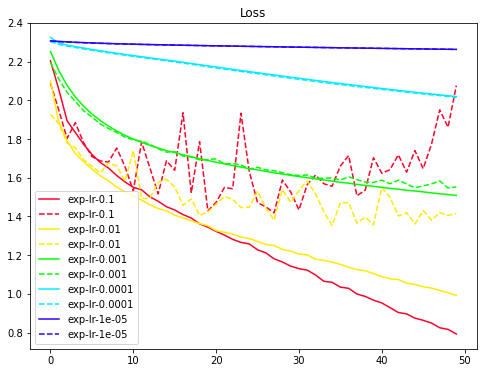

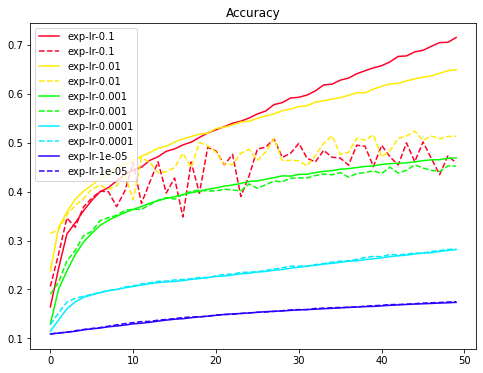

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [14]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (N

Epoch 49/50
196/196 [==============================] - 4s 21ms/step - loss: 2.3067 - accuracy: 0.0997 - val_loss: 2.3078 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 4s 22ms/step - loss: 2.3068 - accuracy: 0.1001 - val_loss: 2.3093 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_

Epoch 47/50
196/196 [==============================] - 4s 20ms/step - loss: 2.3032 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 4s 20ms/step - loss: 2.3032 - accuracy: 0.0970 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 4s 21ms/step - loss: 2.3032 - accuracy: 0.0993 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 4s 22ms/step - loss: 2.3032 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.1000
Experiment with LR = 0.001000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________

196/196 [==============================] - 5s 25ms/step - loss: 0.7236 - accuracy: 0.7404 - val_loss: 1.6628 - val_accuracy: 0.5223
Epoch 45/50
196/196 [==============================] - 6s 29ms/step - loss: 0.7057 - accuracy: 0.7458 - val_loss: 1.7251 - val_accuracy: 0.5199
Epoch 46/50
196/196 [==============================] - 5s 25ms/step - loss: 0.7054 - accuracy: 0.7452 - val_loss: 1.6927 - val_accuracy: 0.5247
Epoch 47/50
196/196 [==============================] - 5s 26ms/step - loss: 0.6954 - accuracy: 0.7507 - val_loss: 1.7119 - val_accuracy: 0.5218
Epoch 48/50
196/196 [==============================] - 5s 23ms/step - loss: 0.6835 - accuracy: 0.7549 - val_loss: 1.7507 - val_accuracy: 0.5086
Epoch 49/50
196/196 [==============================] - 5s 25ms/step - loss: 0.6731 - accuracy: 0.7575 - val_loss: 1.7213 - val_accuracy: 0.5209
Epoch 50/50
196/196 [==============================] - 5s 25ms/step - loss: 0.6506 - accuracy: 0.7643 - val_loss: 1.8386 - val_accuracy: 0.5123
Expe

Epoch 42/50
196/196 [==============================] - 12s 61ms/step - loss: 0.9675 - accuracy: 0.6597 - val_loss: 1.3463 - val_accuracy: 0.5397
Epoch 43/50
196/196 [==============================] - 12s 64ms/step - loss: 0.9452 - accuracy: 0.6682 - val_loss: 1.3413 - val_accuracy: 0.5334
Epoch 44/50
196/196 [==============================] - 9s 46ms/step - loss: 0.9295 - accuracy: 0.6742 - val_loss: 1.3799 - val_accuracy: 0.5278
Epoch 45/50
196/196 [==============================] - 10s 52ms/step - loss: 0.9181 - accuracy: 0.6778 - val_loss: 1.4326 - val_accuracy: 0.5184
Epoch 46/50
196/196 [==============================] - 9s 48ms/step - loss: 0.9182 - accuracy: 0.6786 - val_loss: 1.3622 - val_accuracy: 0.5325
Epoch 47/50
196/196 [==============================] - 9s 48ms/step - loss: 0.8957 - accuracy: 0.6874 - val_loss: 1.3730 - val_accuracy: 0.5381
Epoch 48/50
196/196 [==============================] - 9s 48ms/step - loss: 0.8916 - accuracy: 0.6882 - val_loss: 1.4780 - val_accura

Epoch 40/50
196/196 [==============================] - 6s 28ms/step - loss: 1.4394 - accuracy: 0.4987 - val_loss: 1.4844 - val_accuracy: 0.4813
Epoch 41/50
196/196 [==============================] - 6s 30ms/step - loss: 1.4344 - accuracy: 0.5002 - val_loss: 1.4780 - val_accuracy: 0.4770
Epoch 42/50
196/196 [==============================] - 6s 28ms/step - loss: 1.4297 - accuracy: 0.5011 - val_loss: 1.4739 - val_accuracy: 0.4786
Epoch 43/50
196/196 [==============================] - 9s 45ms/step - loss: 1.4243 - accuracy: 0.5032 - val_loss: 1.4671 - val_accuracy: 0.4829
Epoch 44/50
196/196 [==============================] - 6s 31ms/step - loss: 1.4198 - accuracy: 0.5059 - val_loss: 1.4614 - val_accuracy: 0.4858
Epoch 45/50
196/196 [==============================] - 6s 31ms/step - loss: 1.4138 - accuracy: 0.5066 - val_loss: 1.4615 - val_accuracy: 0.4869
Epoch 46/50
196/196 [==============================] - 11s 55ms/step - loss: 1.4107 - accuracy: 0.5092 - val_loss: 1.4580 - val_accuracy

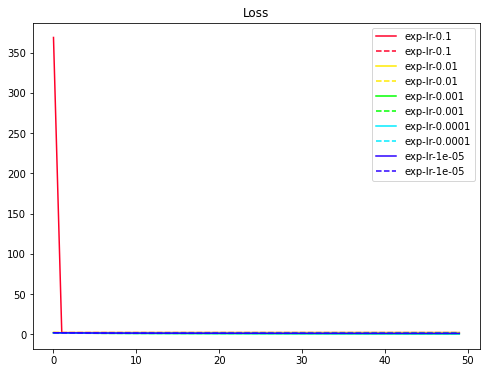

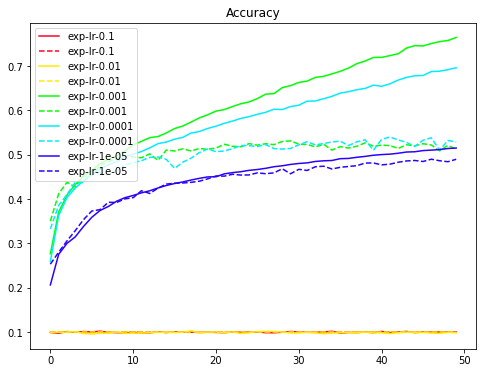

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
'''
以此資料集來說，
SGD: lr 0.01時準確率最高，為0.7450
RMSprop: lr 0.001時準確率最高，為0.7000
Adagrad: lr 0.1時準確率最高，為0.7147
Adam: lr 0.001時準確率最高，為0.7643
總結來說，不同的優化器適合不一樣的 learning rate 設置，而以此例的結果來說 優化器Adam在learning rate設為0.001時準確率最高。
'''